In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv ('D:\Mukund\Datasets\dataset.csv')

In [3]:
df.head(10)

,text,label
0,We cordially invite you to attend our annual g...,AI
1,"Hey, you're invited to our big party on Friday...",human
2,Our esteemed customers are hereby informed tha...,AI
3,Hey everyone! Just wanted to let you know that...,human
4,Please be advised that the deadline for submit...,AI
5,"Hey, don't forget! You gotta submit your appli...",human
6,"Dear Mr. Johnson, we are pleased to inform you...",AI
7,Hey John! Great news! You got the job! Come to...,human
8,Our esteemed guests are requested to kindly ab...,AI
9,"Hey folks, for the charity gala, let's all dre...",human


In [21]:
print(df['text'][1])
print(df['label'][1])

Hey, you're invited to our big party on Friday, July 10th, starting at 7 PM! Don't miss it!
human


In [5]:
df=df.reset_index()

In [6]:
df = df.drop(['index'], axis=1)

In [7]:
df.head(10)

,text,label
0,We cordially invite you to attend our annual g...,AI
1,"Hey, you're invited to our big party on Friday...",human
2,Our esteemed customers are hereby informed tha...,AI
3,Hey everyone! Just wanted to let you know that...,human
4,Please be advised that the deadline for submit...,AI
5,"Hey, don't forget! You gotta submit your appli...",human
6,"Dear Mr. Johnson, we are pleased to inform you...",AI
7,Hey John! Great news! You got the job! Come to...,human
8,Our esteemed guests are requested to kindly ab...,AI
9,"Hey folks, for the charity gala, let's all dre...",human


In [8]:
df["label"].value_counts()

label
AI       357
human    357
form       1
Name: count, dtype: int64

In [9]:
X=df['text']
y=df['label']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(572,) (143,) (572,) (143,)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [12]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train_tfidf, y_train)

SVC(random_state=42)

In [13]:
from sklearn.metrics import accuracy_score
train_predict = model.predict(X_train_tfidf)
training_data_accuracy = accuracy_score(y_train, train_predict)
print("Training Accuracy:", training_data_accuracy * 100)

Training Accuracy: 99.47552447552448


In [14]:
test_predict = model.predict(X_test_tfidf)
testing_data_accuracy = accuracy_score(y_test, test_predict)
print("Testing Accuracy:", testing_data_accuracy * 100)

Testing Accuracy: 93.00699300699301


In [15]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, test_predict)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[72  6]
 [ 4 61]]


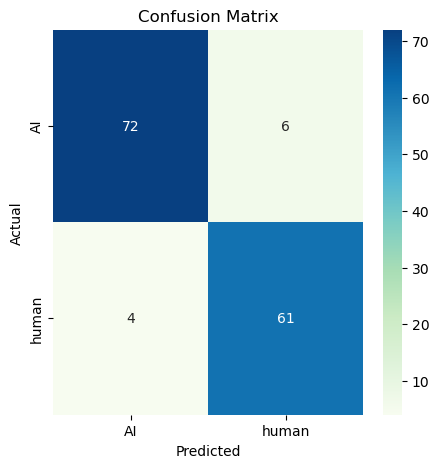

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix_df = pd.DataFrame(conf_matrix, index=["AI", "human"], columns=["AI", "human"])
plt.figure(figsize=(5, 5))
sn.heatmap(confusion_matrix_df, annot=True, cmap="GnBu", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()